# Diabetes Prediction Model 

In [ ]:
"""
Data Analysis inspired by:
- Original notebook: https://www.kaggle.com/code/yousseftaha3/diabetes-prediction-random-forest-97-3
- Author: Youssef Taha
- License: Apache 2.0

Modified and adapted for Intelligent Health Prediction System - university project.
"""

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [19]:
print("Shape:", df.shape)

Shape: (100000, 9)


In [20]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [35]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
10841,Female,5.0,0,0,No Info,15.65,4.8,159,0
95873,Female,65.0,0,0,never,22.77,3.5,200,0
36897,Female,35.0,0,0,never,26.19,4.0,80,0
7368,Female,45.0,1,0,former,43.59,8.8,140,1
96565,Male,20.0,0,0,No Info,23.53,6.6,159,0


In [36]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [37]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [38]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 3854


# Data Cleaning

In [40]:
df = df.drop_duplicates()

cat_cols = ['gender', 'smoking_history']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [41]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [42]:
df.shape

(96146, 9)

In [43]:
df.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [44]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
56460,Female,33.0,0,0,No Info,43.96,6.5,140,1
66502,Male,29.0,0,0,never,23.07,5.0,130,0
98606,Female,40.0,0,0,never,41.65,6.5,90,0
23216,Male,27.0,0,0,never,27.32,6.2,155,0
98688,Male,38.0,0,0,former,27.41,5.0,158,0


# Data Visualization

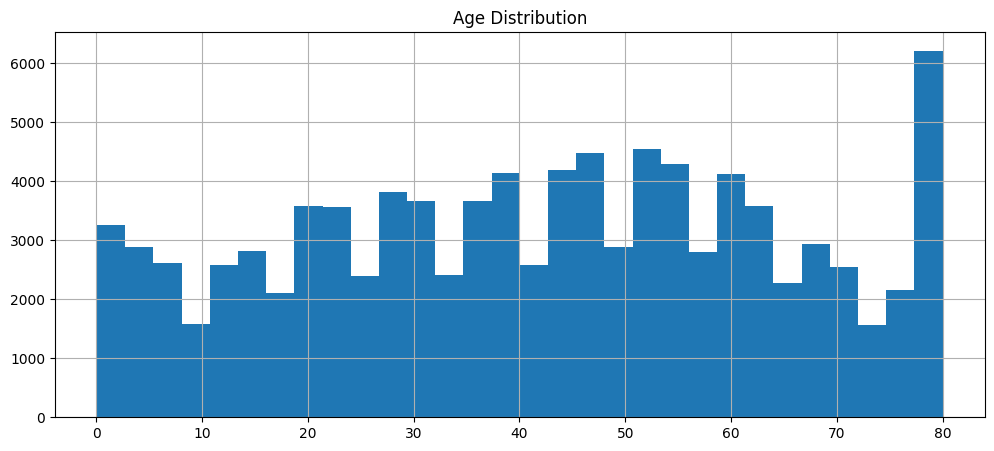

In [45]:
plt.figure(figsize=(12,5))
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()

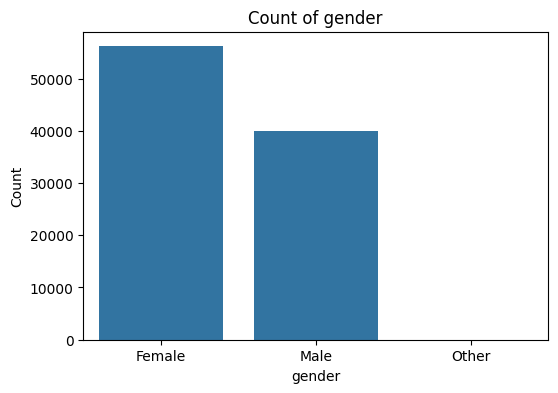

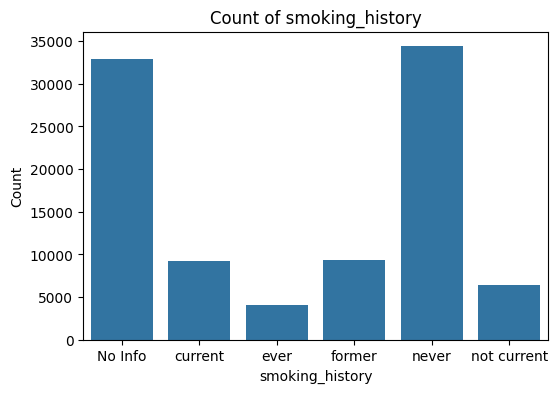

In [46]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

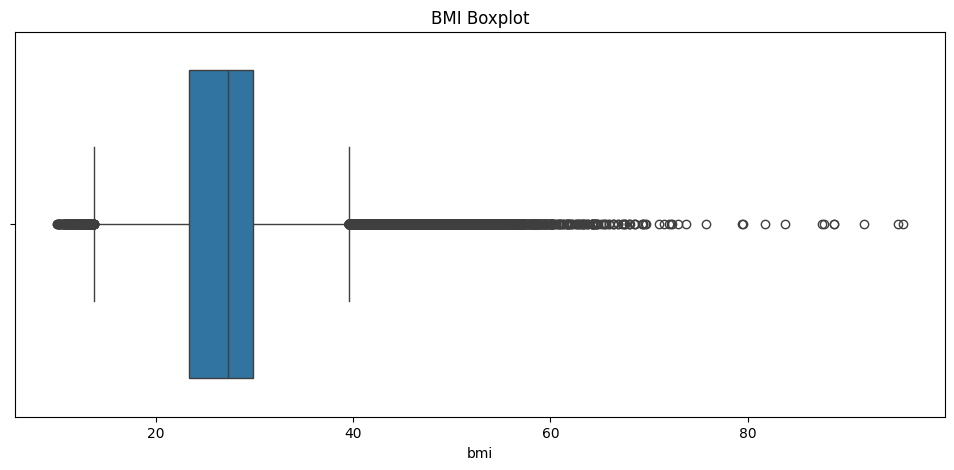

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['bmi'])
plt.title("BMI Boxplot")
plt.show()

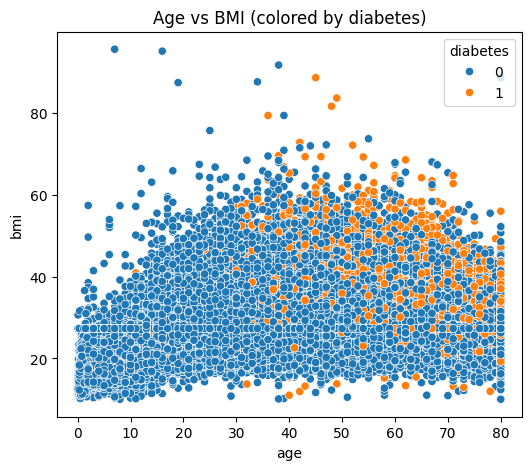

In [48]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes')
plt.title("Age vs BMI (colored by diabetes)")
plt.show()

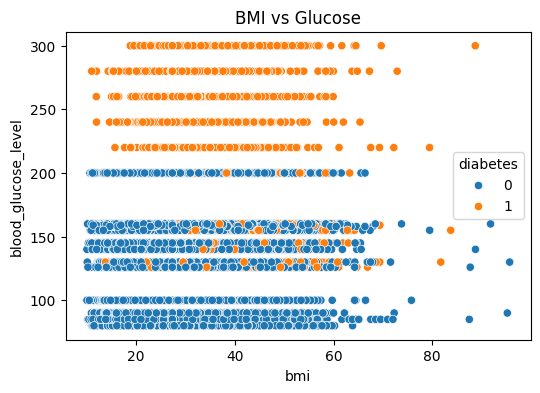

In [49]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="blood_glucose_level", hue="diabetes", data=df)
plt.title("BMI vs Glucose")
plt.show()

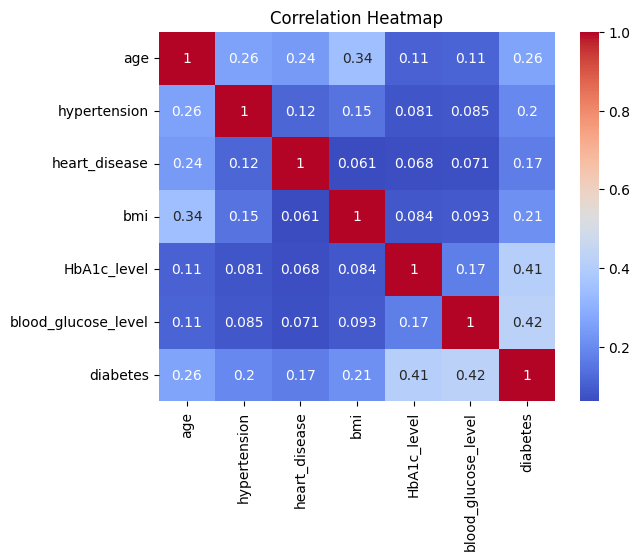

In [50]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering & Preprocessing

In [51]:
df_encoded = df.copy()
label_cols = ['gender', 'smoking_history']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [52]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

selected_features = importances.head(5).index.tolist()
print("\nSelected Features:", selected_features)

X_selected = X[selected_features]

HbA1c_level            0.395887
blood_glucose_level    0.318824
bmi                    0.123821
age                    0.102636
smoking_history        0.027672
hypertension           0.015569
heart_disease          0.009344
gender                 0.006247
dtype: float64

Selected Features: ['HbA1c_level', 'blood_glucose_level', 'bmi', 'age', 'smoking_history']


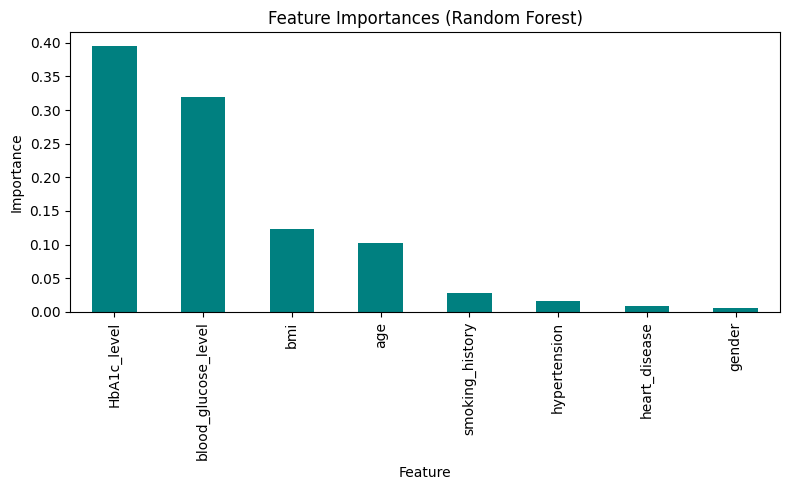

In [53]:
plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

## Only 5 of the features are important for prediction. We will select only those features for model training.

In [54]:
X_final = X_selected
y_final = y

X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y_final,
    test_size=0.3,
    random_state=42,
    stratify=y_final
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (67302, 5)
Validation shape: (14422, 5)
Test shape: (14422, 5)


In [55]:
X_train.sample(5)

,HbA1c_level,blood_glucose_level,bmi,age,smoking_history
27194,6.5,80,24.77,42.0,0
50547,6.0,159,23.35,28.0,1
99432,5.7,80,17.50,17.0,4
94848,5.7,126,18.49,80.0,0
96367,5.7,80,22.58,19.0,4


In [56]:
y_train.sample(5)

80533    0
96303    0
23358    0
54096    0
64329    0
Name: diabetes, dtype: int64

In [57]:
print("Original:", Counter(y_train))

target_minority = 10000

n_min = sum(y_train == 1)
n_maj = sum(y_train == 0)

max_minority = min(target_minority, n_maj)

sampling_ratio = max_minority / n_maj

sm = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Counts after SMOTE:", Counter(y_train_res))
print("Train after SMOTE:", X_train_res.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Original: Counter({0: 61365, 1: 5937})
Counts after SMOTE: Counter({0: 61365, 1: 10000})
Train after SMOTE: (71365, 5)
Val: (14422, 5)
Test: (14422, 5)


In [58]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model Selection

## 1. Logistic Regression


In [61]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)

y_val_pred = log_reg.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Logistic Regression accuracy:", accuracy_score(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13149
           1       0.76      0.65      0.70      1273

    accuracy                           0.95     14422
   macro avg       0.86      0.81      0.84     14422
weighted avg       0.95      0.95      0.95     14422

Confusion Matrix:
 [[12886   263]
 [  450   823]]
Logistic Regression accuracy: 0.9505616419359312


##  2. Decision Tree

In [64]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

y_val_pred_dt = dt_model.predict(X_val)
print(classification_report(y_val, y_val_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))
print("Decision Tree accuracy:", accuracy_score(y_val, y_val_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13149
           1       0.68      0.74      0.71      1273

    accuracy                           0.95     14422
   macro avg       0.83      0.85      0.84     14422
weighted avg       0.95      0.95      0.95     14422

Confusion Matrix:
 [[12714   435]
 [  337   936]]
Decision Tree accuracy: 0.9464706698100125


## 3. Random Forest Classifier

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_val_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_val_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))
print("Random Forest accuracy:", accuracy_score(y_val, y_val_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.67      0.77      1273

    accuracy                           0.96     14422
   macro avg       0.94      0.83      0.88     14422
weighted avg       0.96      0.96      0.96     14422

Confusion Matrix:
 [[13058    91]
 [  414   859]]
Random Forest accuracy: 0.96498405214256


## 3.*  Random Forest with class_weight='balanced'

In [67]:
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_balanced.fit(X_train_res, y_train_res)

y_val_pred_bal = rf_balanced.predict(X_val)
print(classification_report(y_val, y_val_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_bal))
print("Random Forest (class_weight='balanced') accuracy:", accuracy_score(y_val, y_val_pred_bal))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.90      0.67      0.77      1273

    accuracy                           0.96     14422
   macro avg       0.94      0.83      0.88     14422
weighted avg       0.96      0.96      0.96     14422

Confusion Matrix:
 [[13055    94]
 [  416   857]]
Random Forest (class_weight='balanced') accuracy: 0.964637359589516


### Optimal threshold search

In [68]:
y_val_probs = rf_balanced.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)

best_f1 = 0
best_threshold = 0
f1_scores = []

for thr in thresholds:
    y_val_pred_thr = (y_val_probs >= thr).astype(int)
    f1 = f1_score(y_val, y_val_pred_thr, pos_label=1)
    f1_scores.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thr

print(f"Best threshold for class 1: {best_threshold}")
print(f"Best F1-score for class 1: {best_f1}")

Best threshold for class 1: 0.8899999999999996
Best F1-score for class 1: 0.7876190476190477


In [71]:
threshold = best_threshold
y_val_pred = (y_val_probs >= threshold).astype(int)

val_acc = accuracy_score(y_val, y_val_pred)
print("Random Forest - Validation Accuracy :", val_acc)
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Random Forest - Validation Accuracy : 0.9690750242684787
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13149
           1       1.00      0.65      0.79      1273

    accuracy                           0.97     14422
   macro avg       0.98      0.82      0.89     14422
weighted avg       0.97      0.97      0.97     14422

Confusion Matrix:
 [[13149     0]
 [  446   827]]


## 4. Multi-Layer Perceptron - Neural Network

In [76]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3 warstwy ukryte
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_res_scaled, y_train_res)  
y_val_pred_mlp = mlp.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred_mlp))
print("MLP Accuracy:", accuracy_score(y_val, y_val_pred_mlp))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.92      0.69      0.79      1273

    accuracy                           0.97     14422
   macro avg       0.94      0.84      0.89     14422
weighted avg       0.97      0.97      0.97     14422

MLP Accuracy: 0.9673415615032589


## 5. Deep Neural Network

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(256, activation='relu', input_shape=(5,)), 
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

history = model.fit(
    X_train_res_scaled, y_train_res,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_val_pred_nn = (model.predict(X_val_scaled) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred_nn))


Epoch 1/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9146 - auc: 0.9314 - loss: 0.2092 - val_accuracy: 0.9623 - val_auc: 0.9665 - val_loss: 0.1070 - learning_rate: 0.0010
Epoch 2/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9439 - auc: 0.9656 - loss: 0.1413 - val_accuracy: 0.9648 - val_auc: 0.9669 - val_loss: 0.1058 - learning_rate: 0.0010
Epoch 3/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9464 - auc: 0.9697 - loss: 0.1317 - val_accuracy: 0.9659 - val_auc: 0.9682 - val_loss: 0.1039 - learning_rate: 0.0010
Epoch 4/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9486 - auc: 0.9702 - loss: 0.1281 - val_accuracy: 0.9675 - val_auc: 0.9703 - val_loss: 0.0975 - learning_rate: 0.0010
Epoch 5/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.9506 - auc: 0.9723 - loss: 0.1229 - val_accuracy: 0.9682 - val_auc: 0.9716 - val_loss: 0.1009 - learning_rate: 0.0010
Epoch 6/100
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step

## 6. Gradient Boosting Classifier - XGBoost

In [84]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,  
    reg_lambda=1.0,  
    scale_pos_weight=len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1]), 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(
    X_train_res, y_train_res,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_val_pred_xgb = xgb_model.predict(X_val)
print(classification_report(y_val, y_val_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred_xgb))


c:\Users\chame\miniforge3\envs\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     13149
           1       0.52      0.87      0.65      1273

    accuracy                           0.92     14422
   macro avg       0.75      0.90      0.80     14422
weighted avg       0.95      0.92      0.93     14422

XGBoost Accuracy: 0.9181805574816253


## 7. K-Nearest Neighbors (KNN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=11, 
    weights='distance',  
    metric='minkowski',
    p=2
)

knn_model.fit(X_train_res_scaled, y_train_res)
y_val_pred_knn = knn_model.predict(X_val_scaled)

print(classification_report(y_val, y_val_pred_knn))
print("KNN Accuracy:", accuracy_score(y_val, y_val_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13149
           1       0.83      0.66      0.74      1273

    accuracy                           0.96     14422
   macro avg       0.90      0.83      0.86     14422
weighted avg       0.96      0.96      0.96     14422

KNN Accuracy: 0.9581888781028983


# Model Training : Chosen model Random Forest with class_weight='balanced'

In [86]:
X_train_final = np.concatenate([X_train, X_val], axis=0)
y_train_final = np.concatenate([y_train, y_val], axis=0)

In [87]:
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_final.fit(X_train_final, y_train_final)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [88]:
y_test_probs = rf_final.predict_proba(X_test.values)[:, 1]
threshold = 0.89
y_test_pred = (y_test_probs >= threshold).astype(int)

In [89]:
test_acc = accuracy_score(y_test, y_test_pred)
print("Random Forest - Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

Random Forest - Test Accuracy: 0.9730966578837886
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



## Model Evaluation

In [91]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall    = recall_score(y_test, y_test_pred, zero_division=0)
f1        = f1_score(y_test, y_test_pred, zero_division=0)
roc_auc   = roc_auc_score(y_test, y_test_probs)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}\n")
print(classification_report(y_test, y_test_pred))

Accuracy : 0.9731
Precision: 1.0000
Recall   : 0.6950
F1-score : 0.8200
ROC-AUC  : 0.9657

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



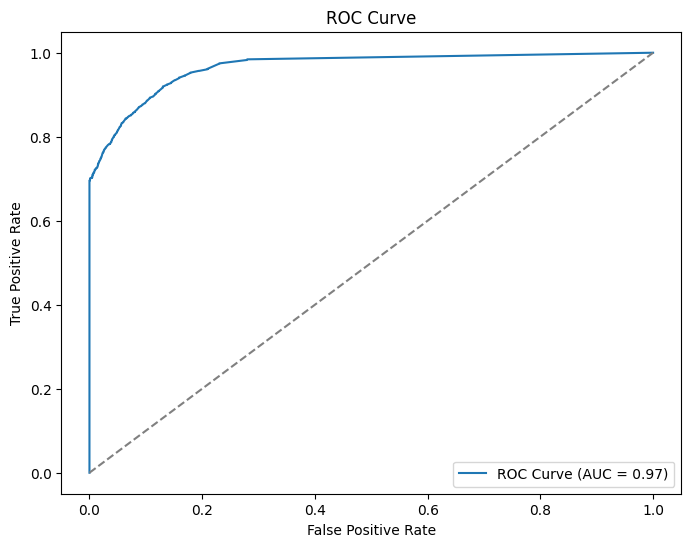

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(100, 500),       
    'max_depth': [10, 15, 20, 25, None],     
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]  
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    rf,
    param_distributions,
    n_iter=20,              
    scoring='f1',
    cv=3,                 
    n_jobs=-1,
    random_state=42,
    verbose=2              
)

random_search.fit(X_train_res, y_train_res)  

print("Best params:", random_search.best_params_)
print("Best F1 Score (CV):", random_search.best_score_)

best_rf = random_search.best_estimator_

y_val_pred = best_rf.predict(X_val)
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
Best F1 Score (CV): 0.8342186274532629
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     13149
           1       0.74      0.76      0.75      1273

    accuracy                           0.96     14422
   macro avg       0.86      0.87      0.86     14422
weighted avg       0.96      0.96      0.96     14422



In [103]:
y_proba = best_rf.predict_proba(X_test)[:, 1]
threshold =  0.89
y_pred_thresh = (y_proba >= threshold).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422



In [104]:
print('Train Accuracy : ' , best_rf.score(X_train , y_train))
print('Test Accuracy : ' , best_rf.score(X_test , y_test))

Train Accuracy :  0.9846066981664735
Test Accuracy :  0.9573568159755929


# Result & Interpretation

In [105]:
print(classification_report(y_test, y_pred_thresh))
print("Final Test Accuracy:", accuracy_score(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13150
           1       1.00      0.69      0.82      1272

    accuracy                           0.97     14422
   macro avg       0.99      0.85      0.90     14422
weighted avg       0.97      0.97      0.97     14422

Final Test Accuracy: 0.9730273193731799


In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_thresh)
TN, FP, FN, TP = cm.ravel()

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

classification_error = (FP + FN) / (TP + TN + FP + FN)
print(f"Classification Error: {classification_error:.4f}")

True Negatives: 13150
False Positives: 0
False Negatives: 389
True Positives: 883
Classification Error: 0.0270


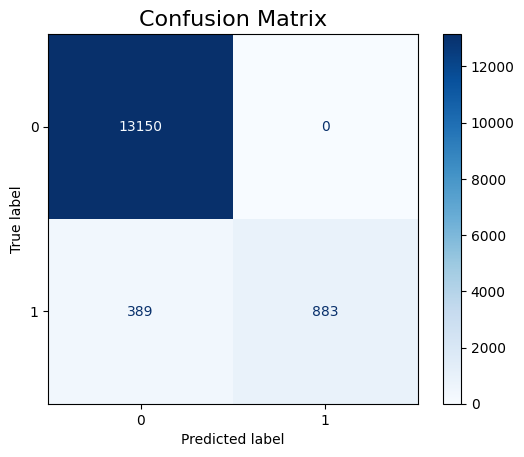

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix" , fontsize =16)
plt.show()

### Model saving

In [ ]:
import pickle

model_path = "../trained_models/diabetes-random_forest_model.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(best_rf, f)


Loaded model accuracy: 0.9552073221467203
